Importing the required libraries

| Module               | Purpose                   | Common Use                  |
| -------------------- | ------------------------- | --------------------------- |
| `os`                 | File/folder handling      | `os.path.exists`, `os.walk` |
| `tensorflow`         | Deep learning framework   | Model building and training |
| `ImageDataGenerator` | Load & augment image data | `flow_from_directory(...)`  |
| `matplotlib.pyplot`  | Plot charts               | `plt.plot`, `plt.show()`    |


In [14]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Setting path

In [64]:
# train_dir = 'D:\PORTFOLIO\PROJECTS\ImageClassifierusingKeras\datasets'
base_dir = os.getcwd() # This gets current script's folder
train_dir = os.path.join(base_dir, 'datasets')

In [65]:
print("Train dir exists?", os.path.exists(train_dir))

Train dir exists? True


In [70]:
for root, dirs, files in os.walk(train_dir):
    print(f"📂 {root} — 🖼️ {len(files)} files")

📂 D:\PORTFOLIO\PROJECTS\ImageClassifierusingKeras\datasets — 🖼️ 0 files
📂 D:\PORTFOLIO\PROJECTS\ImageClassifierusingKeras\datasets\cats — 🖼️ 5 files
📂 D:\PORTFOLIO\PROJECTS\ImageClassifierusingKeras\datasets\dogs — 🖼️ 5 files


Preprocess

In [71]:
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)


In [72]:
train_data=datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='training'

)

Found 8 images belonging to 2 classes.


In [73]:
val_data=datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='validation'

)

Found 2 images belonging to 2 classes.


Model

In [75]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [76]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Train

In [77]:
history=model.fit(train_data,validation_data=val_data,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3750 - loss: 0.6985 - val_accuracy: 0.5000 - val_loss: 3.2511
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.5000 - loss: 1.6945 - val_accuracy: 0.5000 - val_loss: 5.6672
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.5000 - loss: 3.8726 - val_accuracy: 0.5000 - val_loss: 3.5874
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.5000 - loss: 1.7014 - val_accuracy: 0.0000e+00 - val_loss: 1.0273
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 1.0000 - loss: 0.2140 - val_accuracy: 0.5000 - val_loss: 1.6626


Plot

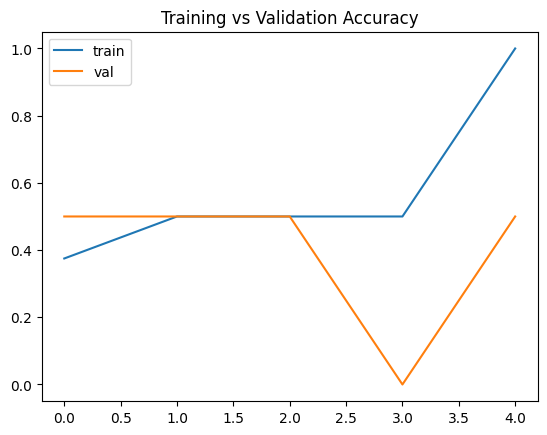

In [80]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()